In [1]:
!pip3 install praat-parselmouth
import parselmouth
from parselmouth.praat import call
import os
language = "DEUHOF"

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\program files\python37\python.exe -m pip install --upgrade pip' command.


In [2]:
mp3_files = []
wav_files = []
sounds = []

In [3]:
import os

def convert_to_wav(files, lang):
    for mp3_file in files:
        if lang != 'CMNUN1':
            file_name = 'C:/Users/shery/JupyterProjects/'+lang+'/'+lang+'_segmented_audio/'+mp3_file
        else:
            file_name = mp3_file
        cmd = 'sox ' + file_name + ' ' + file_name[:-3] +'wav'
        os.system(cmd)

In [4]:
'''
english_echo = ['B06___03_Romans______ENGESVN1DA_11_92720_97680.mp3',
                'B06___03_Romans______ENGESVN1DA_12_97680_105040.mp3',
                'B06___03_Romans______ENGESVN1DA_13_105040_113960.mp3',
                'B06___03_Romans______ENGESVN1DA_14_113960_117640.mp3',
                'B06___03_Romans______ENGESVN1DA_15_117640_120760.mp3',
                'B06___03_Romans______ENGESVN1DA_16_120760_124040.mp3',
                'B06___03_Romans______ENGESVN1DA_17_124040_126560.mp3',
                'B06___03_Romans______ENGESVN1DA_18_126560_132280.mp3',
                'B06___04_Romans______ENGESVN1DA_7_46960_54160.mp3',
                'B06___04_Romans______ENGESVN1DA_8_54160_59560.mp3',
               ]
english_nonecho = ['B06___01_Romans______ENGESVN1DA_8_63240_71800.mp3',
                   'B06___01_Romans______ENGESVN1DA_9_71800_79720.mp3',
                   'B06___01_Romans______ENGESVN1DA_21_178720_190320.mp3',
                   'B06___01_Romans______ENGESVN1DA_22_190320_193520.mp3',
                   'B06___01_Romans______ENGESVN1DA_23_193520_203800.mp3',
                   'B06___01_Romans______ENGESVN1DA_24_203800_211640.mp3',
                   'B06___01_Romans______ENGESVN1DA_25_211640_223880.mp3',
                   'B06___01_Romans______ENGESVN1DA_26_223880_232800.mp3',
                   'B06___01_Romans______ENGESVN1DA_27_232800_248000.mp3',
                   'B06___01_Romans______ENGESVN1DA_28_248000_256160.mp3',
                  ]
'''

# fill echo and non_echo lists with correct mp3s

lang = 'YUEUNV'
import os
all_mp3 = os.listdir('C:/Users/shery/JupyterProjects/'+lang+'/'+lang+'_segmented_audio')
echo = []
non_echo = []

for file in all_mp3:
    if "B06" in file and 'mp3' in file:
        if file[6:8] == '01' and (file[32] == '8' or file[32] == '9'):
            non_echo.append(file)
        for verse in ['21', '22', '23', '24', '25', '26', '27', '28']:
            if file[6:8] == '01' and file[32:34] == verse:
                non_echo.append(file)  
        if file[6:8] == '04' and (file[32] == '7' or file[32] == '8'):
            echo.append(file)
        for verse in ['11', '12', '13', '14', '15', '16', '17', '18']:
            if file[6:8] == '03' and file[32:34] == verse:
                echo.append(file)  

In [5]:
# only if files have not been converted from mp3 to wav!
convert_to_wav(echo, lang)
convert_to_wav(non_echo, lang)

In [6]:
# save wav files of echo and non_echo to wav_files list

wav_files = []
def save_wav_files(files, lang):
    for file in files:
        if lang == 'HUNHUN':
            wav_files.append('C:/Users/shery/JupyterProjects/'+lang+'/'+lang+'_wav/'+file[:-3] +'wav')
        elif lang != 'CMNUN1':
            wav_files.append('C:/Users/shery/JupyterProjects/'+lang+'/'+lang+'_segmented_audio/'+file[:-3] +'wav')
        else:
            wav_files.append(file[:-3] +'wav')

save_wav_files(echo, lang)
save_wav_files(non_echo, lang)

In [15]:
# convert wav files to Parselmouth sounds

sounds = []
for wav_file in wav_files[0:10]:
    sound = parselmouth.Sound(wav_file)
    sound.name = wav_file
    print(sound.name)
    sounds.append(sound)

# take 10 sounds at a time (either 10 echo or 10 nonecho)
assert len(sounds) == 10

C:/Users/shery/JupyterProjects/YUEUNV/YUEUNV_segmented_audio/B06___03_Romans______YUHUNVN1DA_11_96840_99440.wav
C:/Users/shery/JupyterProjects/YUEUNV/YUEUNV_segmented_audio/B06___03_Romans______YUHUNVN1DA_12_99440_106200.wav
C:/Users/shery/JupyterProjects/YUEUNV/YUEUNV_segmented_audio/B06___03_Romans______YUHUNVN1DA_13_106200_110120.wav
C:/Users/shery/JupyterProjects/YUEUNV/YUEUNV_segmented_audio/B06___03_Romans______YUHUNVN1DA_14_110120_111560.wav
C:/Users/shery/JupyterProjects/YUEUNV/YUEUNV_segmented_audio/B06___03_Romans______YUHUNVN1DA_15_111560_114080.wav
C:/Users/shery/JupyterProjects/YUEUNV/YUEUNV_segmented_audio/B06___03_Romans______YUHUNVN1DA_16_114080_114280.wav
C:/Users/shery/JupyterProjects/YUEUNV/YUEUNV_segmented_audio/B06___03_Romans______YUHUNVN1DA_17_114280_116560.wav
C:/Users/shery/JupyterProjects/YUEUNV/YUEUNV_segmented_audio/B06___03_Romans______YUHUNVN1DA_18_116560_118160.wav
C:/Users/shery/JupyterProjects/YUEUNV/YUEUNV_segmented_audio/B06___04_Romans______YUHUNVN1D

In [27]:
print(sounds[0].name)

C:/Users/shery/JupyterProjects/RUSBIB/RUSBIB_segmented_audio/B06___03_Romans______RUSBIBN1DA_11_102240_105800.wav


C:/Users/shery/JupyterProjects/YUEUNV/YUEUNV_segmented_audio/B06___03_Romans______YUHUNVN1DA_11_96840_99440.wav 

mean 160.99022058076716
max 277.5446803942381
min 78.752753252483
sd 58.25456586925739 

C:/Users/shery/JupyterProjects/YUEUNV/YUEUNV_segmented_audio/B06___03_Romans______YUHUNVN1DA_12_99440_106200.wav 

mean 137.76678201551746
max 225.19661101376596
min 83.18842912439965
sd 35.50481684156672 

C:/Users/shery/JupyterProjects/YUEUNV/YUEUNV_segmented_audio/B06___03_Romans______YUHUNVN1DA_13_106200_110120.wav 

mean 164.6222208604087
max 277.98054553520603
min 85.6793426000903
sd 59.16266580978459 

C:/Users/shery/JupyterProjects/YUEUNV/YUEUNV_segmented_audio/B06___03_Romans______YUHUNVN1DA_14_110120_111560.wav 

mean 139.88069264099474
max 202.2895384001821
min 103.3510624856196
sd 22.674864453380444 

C:/Users/shery/JupyterProjects/YUEUNV/YUEUNV_segmented_audio/B06___03_Romans______YUHUNVN1DA_15_111560_114080.wav 

mean 154.86848646232184
max 269.1509779755022
min 93.1350825

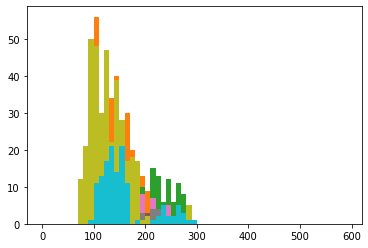

In [16]:
# mean, max, min, sd for pitch

import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

count = 0
avg_mean = 0
avg_max = 0
avg_min = 0
avg_sd = 0

for sound in sounds:
    pitch = sound.to_pitch_ac()
    duration = pitch.get_end_time()
    
    pitch_values = pitch.selected_array['frequency']
    pitch_values[pitch_values==0] = np.nan
    values = [i for i in pitch_values if np.isnan(i)==False]
    plt.hist(values, bins=range(0,600,10))
    
    print(sound.name, '\n')
    #plt.show()

    mean = call(pitch, "Get mean", 0, duration, "Hertz")
    print('mean', mean)
    maximum = call(pitch, "Get maximum", 0, duration, "Hertz", "Parabolic")
    print('max', maximum)
    minimum = call(pitch, "Get minimum", 0, duration, "Hertz", "Parabolic")
    print('min', minimum)
    sd = call(pitch, "Get standard deviation", 0, duration, "Hertz")
    print('sd', sd, '\n')
    
    avg_mean += mean
    avg_max += maximum
    avg_min += minimum
    avg_sd += sd
print(avg_mean/10, '\t', avg_max/10, '\t', avg_min/10, '\t', avg_sd/10, '\n')

In [17]:
# mean, max, min, sd for intensity

avg_mean = 0
avg_max = 0
avg_min = 0
avg_sd = 0

for sound in sounds:
    intensity = sound.to_intensity()
    duration = intensity.get_end_time()
    intensity.values[intensity.values > 0]
    
    print(sound.name, '\n')

    # Not sure if mean or avg is correct
    mean = round(call(intensity, "Get mean", 0, duration), 3)
    #print('mean', mean)
    mean = round(intensity.values[intensity.values > 0].mean(), 3)
    #avg = intensity.get_average(0, duration, averaging_method = <AveragingMethod.MEDIAN: 0>)
    #print(avg)
    maximum = round(call(intensity, "Get maximum", 0, duration, "Parabolic"), 3)
    print('max', maximum)
    minimum = round(call(intensity, "Get minimum", 0, duration, "Parabolic"), 3)
    #print('min', minimum)
    minimum = round(intensity.values[intensity.values > 0].min(), 3)
    sd = round(call(intensity, "Get standard deviation", 0, duration), 3)
    #print('sd', sd)
    sd = round(intensity.values[intensity.values > 0].std(), 3)
    print(mean, '\t', maximum, '\t', minimum, '\t', sd, '\n')
    avg_mean += mean
    avg_max += maximum
    avg_min += minimum
    avg_sd += sd
print(avg_mean/10, '\t', avg_max/10, '\t', avg_min/10, '\t', avg_sd/10, '\n')

C:/Users/shery/JupyterProjects/YUEUNV/YUEUNV_segmented_audio/B06___03_Romans______YUHUNVN1DA_11_96840_99440.wav 

max 81.168
50.301 	 81.168 	 9.324 	 25.445 

C:/Users/shery/JupyterProjects/YUEUNV/YUEUNV_segmented_audio/B06___03_Romans______YUHUNVN1DA_12_99440_106200.wav 

max 82.642
48.132 	 82.642 	 8.144 	 26.145 

C:/Users/shery/JupyterProjects/YUEUNV/YUEUNV_segmented_audio/B06___03_Romans______YUHUNVN1DA_13_106200_110120.wav 

max 84.021
59.999 	 84.021 	 11.893 	 19.208 

C:/Users/shery/JupyterProjects/YUEUNV/YUEUNV_segmented_audio/B06___03_Romans______YUHUNVN1DA_14_110120_111560.wav 

max 81.974
67.096 	 81.974 	 9.933 	 12.093 

C:/Users/shery/JupyterProjects/YUEUNV/YUEUNV_segmented_audio/B06___03_Romans______YUHUNVN1DA_15_111560_114080.wav 

max 82.85
52.121 	 82.85 	 11.062 	 25.916 

C:/Users/shery/JupyterProjects/YUEUNV/YUEUNV_segmented_audio/B06___03_Romans______YUHUNVN1DA_16_114080_114280.wav 

max 79.222
66.642 	 79.222 	 27.157 	 15.297 

C:/Users/shery/JupyterProjects

In [11]:
# mean hnr

total_hnr = 0
for sound in sounds:
    harmonicity = call(sound, "To Harmonicity (cc)", 0.01, 75, 0.1, 1.0)
    hnr = call(harmonicity, "Get mean", 0, 0)
    print(sound.name, '\n')
    print('hnr', hnr, '\n')
    total_hnr += hnr
print("mean", total_hnr/10)

C__Users_shery_JupyterProjects_YUEUNV_YUEUNV_segmented_audio_B06___01_Romans______YUHUNVN1DA_21_138320_148440_wav 

hnr 10.41932969559153 

C__Users_shery_JupyterProjects_YUEUNV_YUEUNV_segmented_audio_B06___01_Romans______YUHUNVN1DA_22_148440_152240_wav 

hnr 12.546043125112252 

C__Users_shery_JupyterProjects_YUEUNV_YUEUNV_segmented_audio_B06___01_Romans______YUHUNVN1DA_23_152240_165000_wav 

hnr 10.843966611986273 

C__Users_shery_JupyterProjects_YUEUNV_YUEUNV_segmented_audio_B06___01_Romans______YUHUNVN1DA_24_165000_167480_wav 

hnr 9.41069112803557 

C__Users_shery_JupyterProjects_YUEUNV_YUEUNV_segmented_audio_B06___01_Romans______YUHUNVN1DA_25_167480_180840_wav 

hnr 11.778293436740476 

C__Users_shery_JupyterProjects_YUEUNV_YUEUNV_segmented_audio_B06___01_Romans______YUHUNVN1DA_26_180840_192720_wav 

hnr 11.117829656540094 

C__Users_shery_JupyterProjects_YUEUNV_YUEUNV_segmented_audio_B06___01_Romans______YUHUNVN1DA_27_192720_212240_wav 

hnr 11.18706786771919 

C__Users_shery_Ju

In [12]:
# mean shimmer and jitter

total_shimmer = 0
total_jitter = 0

for sound in sounds:
    # what are f0min and f0max?
    f0min = 75
    f0max = 500

    # which jitter and shimmer?
    pointProcess = call(sound, "To PointProcess (periodic, cc)", f0min, f0max)
    localJitter = call(pointProcess, "Get jitter (local)", 0, 0, 0.0001, 0.02, 1.3) # use this
    localShimmer =  call([sound, pointProcess], "Get shimmer (local)", 0, 0, 0.0001, 0.02, 1.3, 1.6)

    print('jitter', localJitter)
    print('shimmer', localShimmer, '\n')
    total_jitter += localJitter
    total_shimmer += localShimmer
print("mean jitter", total_jitter/10, "mean shimmer", total_shimmer/10)

jitter 0.03198713824030412
shimmer 0.09798908218449572 

jitter 0.02847308218252509
shimmer 0.07758345319986792 

jitter 0.03254456389564067
shimmer 0.09517288750362457 

jitter 0.03564117682360947
shimmer 0.10156866157335885 

jitter 0.029461079105205307
shimmer 0.08768733149170777 

jitter 0.028979254601114002
shimmer 0.08969586502250933 

jitter 0.03251115409257337
shimmer 0.0903979804261573 

jitter 0.03205386732250564
shimmer 0.0941245959437389 

jitter 0.029313170660943445
shimmer 0.08763909748612855 

jitter 0.02863744726093119
shimmer 0.08807436268244058 

mean jitter 0.030960193418535238 mean shimmer 0.09099333175140295


In [82]:
# Speaking rate - Python script from OSF
# https://osf.io/r8jau/?ref=499aefb361abec341bcebd133699270d3d66f0d5

import math
import pandas as pd
import parselmouth

from parselmouth.praat import call


def speech_rate(filename):
    silencedb = -25
    mindip = 2
    minpause = 0.3

    # print a single header line with column names and units
    # cols = ['soundname', 'nsyll', 'npause', 'dur(s)', 'phonationtime(s)', 'speechrate(nsyll / dur)', 'articulation '
    #        'rate(nsyll / phonationtime)', 'ASD(speakingtime / nsyll)']
    # df = pd.DataFrame(columns = cols)

    sound = parselmouth.Sound(filename)
    originaldur = sound.get_total_duration()
    intensity = sound.to_intensity(50)
    start = call(intensity, "Get time from frame number", 1)
    nframes = call(intensity, "Get number of frames")
    end = call(intensity, "Get time from frame number", nframes)
    min_intensity = call(intensity, "Get minimum", 0, 0, "Parabolic")
    max_intensity = call(intensity, "Get maximum", 0, 0, "Parabolic")

    # get .99 quantile to get maximum (without influence of non-speech sound bursts)
    max_99_intensity = call(intensity, "Get quantile", 0, 0, 0.99)

    # estimate Intensity threshold
    threshold = max_99_intensity + silencedb
    threshold2 = max_intensity - max_99_intensity
    threshold3 = silencedb - threshold2
    if threshold < min_intensity:
        threshold = min_intensity

    # get pauses (silences) and speakingtime
    textgrid = call(intensity, "To TextGrid (silences)", threshold3, minpause, 0.1, "silent", "sounding")
    silencetier = call(textgrid, "Extract tier", 1)
    silencetable = call(silencetier, "Down to TableOfReal", "sounding")
    npauses = call(silencetable, "Get number of rows")
    speakingtot = 0
    for ipause in range(npauses):
        pause = ipause + 1
        beginsound = call(silencetable, "Get value", pause, 1)
        endsound = call(silencetable, "Get value", pause, 2)
        speakingdur = endsound - beginsound
        speakingtot += speakingdur

    intensity_matrix = call(intensity, "Down to Matrix")
    # sndintid = sound_from_intensity_matrix
    sound_from_intensity_matrix = call(intensity_matrix, "To Sound (slice)", 1)
    # use total duration, not end time, to find out duration of intdur (intensity_duration)
    # in order to allow nonzero starting times.
    intensity_duration = call(sound_from_intensity_matrix, "Get total duration")
    intensity_max = call(sound_from_intensity_matrix, "Get maximum", 0, 0, "Parabolic")
    point_process = call(sound_from_intensity_matrix, "To PointProcess (extrema)", "Left", "yes", "no", "Sinc70")
    # estimate peak positions (all peaks)
    numpeaks = call(point_process, "Get number of points")
    t = [call(point_process, "Get time from index", i + 1) for i in range(numpeaks)]

    # fill array with intensity values
    timepeaks = []
    peakcount = 0
    intensities = []
    for i in range(numpeaks):
        value = call(sound_from_intensity_matrix, "Get value at time", t[i], "Cubic")
        if value > threshold:
            peakcount += 1
            intensities.append(value)
            timepeaks.append(t[i])

    # fill array with valid peaks: only intensity values if preceding
    # dip in intensity is greater than mindip
    validpeakcount = 0
    currenttime = timepeaks[0]
    currentint = intensities[0]
    validtime = []

    for p in range(peakcount - 1):
        following = p + 1
        followingtime = timepeaks[p + 1]
        dip = call(intensity, "Get minimum", currenttime, timepeaks[p + 1], "None")
        diffint = abs(currentint - dip)
        if diffint > mindip:
            validpeakcount += 1
            validtime.append(timepeaks[p])
        currenttime = timepeaks[following]
        currentint = call(intensity, "Get value at time", timepeaks[following], "Cubic")

    # Look for only voiced parts
    pitch = sound.to_pitch_ac(0.02, 30, 4, False, 0.03, 0.25, 0.01, 0.35, 0.25, 450)
    voicedcount = 0
    voicedpeak = []

    for time in range(validpeakcount):
        querytime = validtime[time]
        whichinterval = call(textgrid, "Get interval at time", 1, querytime)
        whichlabel = call(textgrid, "Get label of interval", 1, whichinterval)
        value = pitch.get_value_at_time(querytime) 
        if not math.isnan(value):
            if whichlabel == "sounding":
                voicedcount += 1
                voicedpeak.append(validtime[time])

    # calculate time correction due to shift in time for Sound object versus
    # intensity object
    timecorrection = originaldur / intensity_duration

    # Insert voiced peaks in TextGrid
    call(textgrid, "Insert point tier", 1, "syllables")
    for i in range(len(voicedpeak)):
        position = (voicedpeak[i] * timecorrection)
        call(textgrid, "Insert point", 1, position, "")

    # return results
    speakingrate = voicedcount / originaldur
    articulationrate = voicedcount / speakingtot
    npause = npauses - 1
    asd = speakingtot / voicedcount
    speechrate_dictionary = {'soundname':file,
                             'nsyll':voicedcount, # number of syllables
                             'npause': npause, # number of pauses
                             'dur(s)':originaldur, #duration
                             'phonationtime(s)':intensity_duration,
                             'speechrate(nsyll / dur)': speakingrate,
                             "articulation rate(nsyll / phonationtime)":articulationrate,
                             "ASD(speakingtime / nsyll)":asd}
    return speechrate_dictionary



In [83]:
datalist = []
for file in wav_files:
    speechrate_dictionary = speech_rate(file)
    datalist.append(speechrate_dictionary)
df = pd.DataFrame(datalist)

In [84]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 8 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   soundname                                 80 non-null     object 
 1   nsyll                                     80 non-null     int64  
 2   npause                                    80 non-null     int64  
 3   dur(s)                                    80 non-null     float64
 4   phonationtime(s)                          80 non-null     float64
 5   speechrate(nsyll / dur)                   80 non-null     float64
 6   articulation rate(nsyll / phonationtime)  80 non-null     float64
 7   ASD(speakingtime / nsyll)                 80 non-null     float64
dtypes: float64(5), int64(2), object(1)
memory usage: 5.1+ KB


In [85]:
# move speaking rate results to excel file

#!pip3 install openpyxl
import openpyxl
df.to_excel('C:\\Users\shery\JupyterProjects\speaking_rate_data.xlsx')